/var/folders/jd/j3_dfb6x31ngr47b5z6s948m0000gn/T/ipykernel_10686/3206052094.py:20: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0, column_averages.max() * 2)


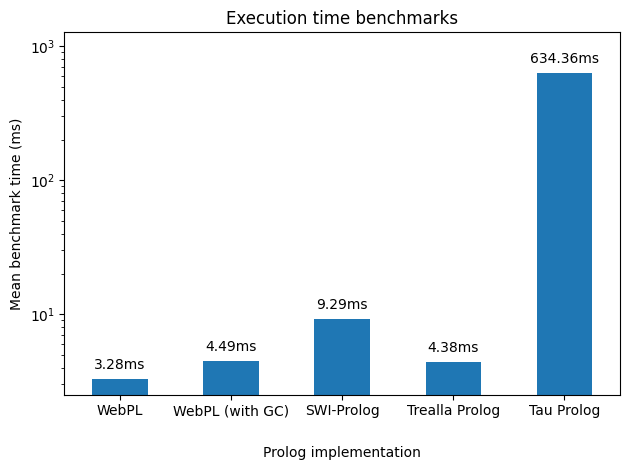

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv("../dissertation/data/results_250204_1951_chrome.time.csv")

df = df[df['benchmark'] != 'tak']
column_averages = df.drop(columns=['benchmark']).mean()

# Plot the bar chart
#plt.figure(figsize=(10, 6))
ax = column_averages.plot(kind='bar')
plt.xlabel('Prolog implementation', labelpad=20)  # Add space between xlabel and xticklabels
plt.ylabel("Mean benchmark time (ms)")
plt.title("Execution time benchmarks")
plt.yscale("log")  # Set y-axis to log scale
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# Adjust y-axis limits to add padding
plt.ylim(0, column_averages.max() * 2)

# Add bar values just above the top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}ms', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()  # Adjust the layout to make room for the labels
plt.savefig("execution.pdf")

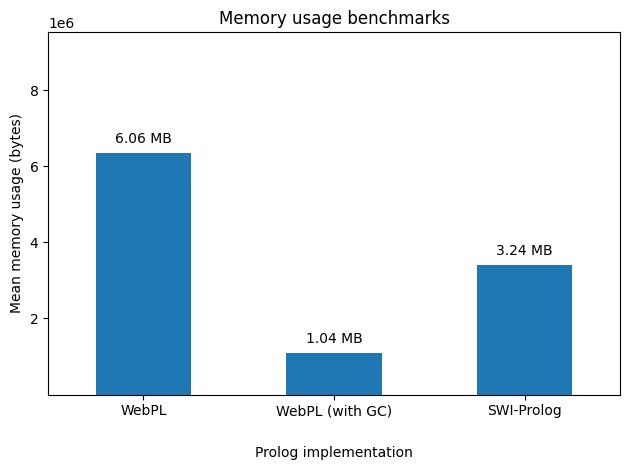

In [7]:
# Load the CSV file for memory benchmark
df_memory = pd.read_csv("../dissertation/data/results_250204_1951_chrome.memory.csv")

# Calculate the average of each column, excluding the 'benchmark' column
column_averages_memory = df_memory.drop(columns=['benchmark']).mean()

# Plot the bar chart for memory benchmark
#plt.figure(figsize=(10, 6))
ax_memory = column_averages_memory.plot(kind='bar')
plt.xlabel('Prolog implementation')
plt.ylabel("Mean memory usage (bytes)")
plt.title("Memory usage benchmarks")
ax_memory.set_xticklabels(ax_memory.get_xticklabels(), rotation=0)
# Adjust y-axis limits to add padding
plt.ylim(1, column_averages_memory.max() * 1.5)
plt.xlabel('Prolog implementation', labelpad=20)  # Add space between xlabel and xticklabels


# Add bar values just above the top of each bar
for p in ax_memory.patches:
    ax_memory.annotate(f'{(p.get_height() / (1024 * 1024)):.2f} MB', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()  # Adjust the layout to make room for the labels
plt.savefig("memory.pdf")